<a href="https://colab.research.google.com/github/LuisaBeccar/Proyecto_DC_CoderHouse_LuisaBeccarVarela/blob/main/Final_DCII_LuisaBeccarVarela_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

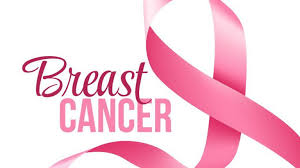

#  **Supervivencia a 5 años del diagnóstico** <br>


> **CODER HOUSE**  <br>
> Data Science: Machine Learning para la ciencia de datos II <br>
> Comision 61145<br>

por Luisa Beccar Varela

# Contexto - Audiencia - Limitaciones
<br>

**Contexto:**
  Dado que el cáncer de mama es el cáncer más diagnosticado en mujeres argentinas (19,6%) y su mayor causa de mortalidad (16,4/100000), y teniendo personalmente varias familiares que padecieron la enfermedad, algunas que sobrevivieron muchos años tras el diagnostico y otras en quienes fue fatal, busco con este análisis responder a la pregunta: ¿Sobrevivirá una mujer más de 5 años tras el diagnóstico de esta enfermedad?. Determine el lapso de 5 años de manera totalmente arbitraria, pensando que es una bunea cantidad de tiempo que un medico puede proveerle a las pacientes como pronostico para que ellas tengan de perspectiva y poder organizar el tiempo de vida que les queda.

**Audiencia:**
  En principio la respuesta a la pregunta sería de interés para el médico, ginecologo mastologo, responsable de informar los resultados a la pacientes y ademas proponer un tratamiento. Me pareceria fundamental evaluar tratamiento y los efectos adversos que pueda llegar a generar en la calidad de vida de la paciente segun el pronostico que ella tenga. Las pacientes recibiendo la información podrían beneficiarse al conocer el pronóstico y poder tomar decisiones  acerca de cómo seguir con sus vidas en el tiempo informado.

**Limitaciones:**
  La base de datos se tomó de mujeres en Estados Unidos de entre 30 y 69 años de edad,  con carcinoma ductal infiltrante y carcinoma lobular, entre 2006 y 2010, excluyendo paciente con tamaño tumoral desconocido, sin ganglios regionales examinados y sin ganglios examinados positivos y que sobrevivieron menos de 1 mes del diagnóstico. La base no cuenta con ciertos marcadores tumorales que son importantes para el diagnóstico y pronóstico del cáncer de mama: Her2. Ademas, no brinda informacion de si las pacientes diagnosticads recibieron algún tratamiento o no, ni cual. Tambien podria mencionarse que las razas de EEUU quizas no sean las mismas que la poblacion argentina, pero ignoraremos ese tema ya que tampoco contamos con un analisis de raza para las mujeres con cancer de mama en Argentina.
<br>


# Hipotesis

**Pregunta principal**
<br>
¿Sobrevivirá la paciente más de 5 años tras el diagnóstico de cáncer de mama, dadas sus características personales y del tumor?
<br>

**Preguntas secundarias**

1.  ¿Se relaciona el 6th Stage con los meses de supervivencia?

2.  ¿De que manera influye la presencia de marcadores hormonales en los meses de supervivencia?

3.  ¿Tienen los tumores de menor diferenciación menor supervivencia?

4.  ¿Existe relación entre la edad de la mujer al diagnóstico y su sobrevida?  


# Base de Datos
<br>

**Repositorio:**  https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

<br>

**Documentacon oficial de la base de datos**:  
https://ieee-dataport.org/open-access/seer-breast-cancer-data
<br>


### ***Atributos de la base orignal "Breast Cancer":**

- **Age** (edad): edad de los sujetos: 30-69 años <br>
- **Race** (raza): raza de los sujetos: White, Black, Other (American Indian/AK Native, Asian/Pasific Islander) <br>
- **Marital Status** (estado civil): Married (casado), Single (soltero), Divorced (divorciado), Widowed (enviudado), Separated (separado) <br>
- **T Stage** (estadio T): clasificacion tumoral segun tamaño de la masa tumoral: T1, T2, T3, T4 *<br>
- **N Stage** (estadio N): clasificacion tumoral segun nodulos linfaticos afectados por tumor: N1, N2, N3 * <br>
- **6th Stage** (estadio clinico): en base al T, N y M: IIA, IIB, IIIA, IIIB, IIIC * <br>
- **Differrentiate** (grado de diferenciacion): de las celulas del tumor observadas en la biopsia: Poorly differentiated, Moderately differentiated, Well differentiated, Undifferentiated. Luego le corregí el nombre de la variable a "Differentiate"
- **Grade**: grado del tumor segun caracteristicas su celulas: 1, 2, 3, 4 o anaplasico * <br>
- **A Stage**: estadio de diseminacion: Regional o Distant (diseminado) con metastasis a distancia. <br>
- **Tumor Size** (tamaño tumoral): en milimetros (de 1  a 140mm) <br>
- **Estrogen Status** (estado estrogenico): si tiene receptores hormonaes estrogenicos o no: Positive o Negative <br>
- **Progesterone Status** (estado progestageno): si tiene receptores hormonaes de progesterona o no: Positive o Negative <br>
- **Regional Node Examined**: numero de nodulos linfaticos regionales examinados (1-61 nodulos) <br>
- **Reginol Node Positive**: cantidad de ganglios regionales examinados que resultaron positivos a malignidad (1 a 46) - Luego le corregí el nombre a "Regional Node Positive" <br>
- **Survival Months**: meses de sobrevida del suejeto (1 a 107)  <br>
- **Status**: estado actual: Alive (vivo) o Dead (murió) <br>
<br>

-----------
Dichas variables se pueden clasificar en:
<br>

*   Atributos cuantitativos:<br>
      *   Continuos (3): Age, Tumor Size, Survival Months <br>
      *   Discretos (2): Regional Node Examined, Regional Node Positive <br>

*   Atributos categoricos:<br>
      * Nominales:<br>
          - Binarios (5): Estrogen Status, Progesterone Status, Status, A State, Sobrevida. <br>
          - Multicategoricos (2): Race, Marital Status. <br>
      * Ordinales (4): N Stage, 6th Stage, Differentiate, Grade <br>





## Consideraciones para la interpretacion:

Info de Estadificacion de Cancer de Mama:
https://www.cancer.org/cancer/types/breast-cancer/understanding-a-breast-cancer-diagnosis/stages-of-breast-cancer.html


<br>

Se creara la variable objetivo (**target feature**) **Sobrevida**: cualitativa binaria: True (1) si la paciente tuvo Survival Months mayor o igual a 60 meses, y  False (0) si sus Survival Months fueron menores de 60 meses.

<br>

Conociendo que hay ciertas relaciones entre las variables, propongo considerer lo siguiente: <br>

- La cantidad de Regional Node Examined determina directamente la maxima cantidad de Regional Node Positive. Por lo tanto propongo crear una nueva variable: **RNP/RNE**. Y conservar solo la variable RNE. <br>

- Tumor Size y T Stage estan relacionadas ya que las categorias de T Stage se establen según el tamaño tumoral(mm), excepto para la categoria T4 donde puede tener el tumor cualquier tamaño. <br>

- 6th Stage es una combinacion de las clasificaciones T N A Stage, Differentiate, Estrogen Status y Progesterone Status, por lo cual podria utilizarse en resumen de dichas variables en conjunto. <br>

- Grade y Differentiate son el mismo criterio de clasificacion, por lo cual eliminaré una de las dos para evitar redundancia. (Elijo eliminar Grade y conservar Differentiate).<br>

- Status: indica si la paciente falleció o no (al momento de la toma de datos para la base). Como no tenemos informacion de si esa muerte fue por la enfermedad o por otras causas, no considerare esa variable en mi analisis y me basaré solamene en los meses de supervivencia al diagnostico. <br>



# Librerias

In [1]:
# importo librerias
%%capture

#base
import pandas as pd
import numpy as np
from datetime import datetime

#visualizacion
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from matplotlib.colors import ListedColormap
import plotly.express as px
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

#encodeo y standarizacion
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# modelos ml
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier;
import lightgbm as lgb;

from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, KFold
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv; # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV;

from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, recall_score, precision_score, f1_score, roc_auc_score

# duda
from scipy.stats import loguniform
! pip install dask[dataframe];
import sys
import warnings
warnings.filterwarnings("ignore")


# ⏏ Descarga de dataset

## Descarga con API

In [2]:
! pip install -q kaggle;
! gdown --id 1ZPZWVpctDMeiT4dFm29xQmQG44Srx0ha;
# el id es la parte del codigo entre barras, copio y pego
# con gdown descargo archivos desde el drive sin tener que hacer la conecccion completa

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZPZWVpctDMeiT4dFm29xQmQG44Srx0ha
To: /content/kaggle.json
100% 73.0/73.0 [00:00<00:00, 240kB/s]


In [3]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle dataset list # para chequear que todo esta bien

usage: kaggle [-h] [-v] [-W] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...
kaggle: error: argument command: invalid choice: 'dataset' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'models', 'm', 'files', 'f', 'config')


In [5]:
! kaggle datasets download -d reihanenamdari/breast-cancer # en keagle pongo 3puntitos copy api command y lo pego (-d...)

Dataset URL: https://www.kaggle.com/datasets/reihanenamdari/breast-cancer
License(s): Attribution 4.0 International (CC BY 4.0)
breast-cancer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# ahi me  da el url de donde se guardo, como zip, agrego el /content/ adelante
path = "/content/breast-cancer.zip"


In [7]:
# des zippeo
! unzip $path


Archive:  /content/breast-cancer.zip
replace Breast_Cancer.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Breast_Cancer.csv       


In [8]:
df = pd.read_csv("/content/Breast_Cancer.csv")
df.head()

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      14                      5   
2            Positive                      14                      7   
3            Positive                       2                      1   
4            Positive                       3                      1   

   Survival Months Status  
0               60  Alive  
1               62  Alive  
2               75  Alive  
3               84  Alive  
4               50  Alive

## Descarga por URL

In [9]:
# usar solo en caso de pereza de hacer la descarga por API
if "df" not in locals():
  url = 'https://raw.githubusercontent.com/LuisaBeccar/Clases-de-CoderHouse-Data-Science/main/Breast_Cancer.csv'
  df = pd.read_csv(url)
  df
else:
  print("Ya se descargó el dataframe Breast_Cancer.csv, renombrado df ")

Ya se descargó el dataframe Breast_Cancer.csv, renombrado df 


# 🤔 Exploratory Analysis

In [10]:
display(df.info())
display(df.describe())
display(df.describe(include=object))
display(df.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

None

Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            4024.000000      4024.000000  
mean                4.158052        71.297962  
std                 5.109331        22.921430  
min                 1.000000         1.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%                 5.000000        90.000000  
max                46.000000       107.000000

Race Marital Status T Stage  N Stage 6th Stage  \
count    4024           4024     4024    4024      4024   
unique      3              5        4       3         5   
top     White        Married       T2      N1       IIA   
freq     3413           2643     1786    2732      1305   

                    differentiate Grade   A Stage Estrogen Status  \
count                        4024  4024      4024            4024   
unique                          4     4         2               2   
top     Moderately differentiated     2  Regional        Positive   
freq                         2351  2351      3932            3755   

       Progesterone Status Status  
count                 4024   4024  
unique                   2      2  
top               Positive  Alive  
freq                  3326   3408

Age                       False
Race                      False
Marital Status            False
T Stage                   False
N Stage                   False
6th Stage                 False
differentiate             False
Grade                     False
A Stage                   False
Tumor Size                False
Estrogen Status           False
Progesterone Status       False
Regional Node Examined    False
Reginol Node Positive     False
Survival Months           False
Status                    False
dtype: bool

Con estos 3 comandos obtenemos una breve descripción de la base: tenemos 2024 observaciones y 16 variables.  Para cada variable podemos ver que tipo de dato es: tenemos 11 tipo objeto, que luego veremos de transformar en categorias, y 5 integers (numeros enteros). Ninguna categoria tiene datos faltantes.
<br>
Luego con los describe vemos las medidas de distribucion que caracterizan cada tipo de variable (integer o object).

# 🖊 Data Wrangling

In [11]:
# Data Preprocessing

df['Sobrevida'] = np.where(df['Survival Months'] >= 60, 1, 0)

# modificar el nombre de Reginol Node Positive por Regional Node Positive
df.rename(columns={'Reginol Node Positive':'Regional Node Positive'}, inplace=True)

# modificar el nombre de "differentiate" por "Differentiate", con mayuscula y sin espacio final
df.rename(columns={'differentiate':'Differentiate'}, inplace=True)

# eliminar la columna Grade porque habla de lo mismo que Differentiate
df.drop('Grade', axis=1, inplace=True)

# eliminar la columna Marital Status ya que no creemos sea relevante
df.drop('Marital Status', axis=1, inplace=True)

# eliminar la columna Status ya que no creemos sea relevante
df.drop('Status', axis=1, inplace=True)

# relacion RNP y RNE: ya que el maximo de RNP depende de RNE
df["RNP/RNE"] = df["Regional Node Positive"] / df["Regional Node Examined"]

#  nombre de columnas sin espacios en blanco antes o despues
columnas = df.columns

for columna in columnas:
    sin_espacio = columna.strip()
    if sin_espacio!=columna:
        df= df.rename(columns = {columna: sin_espacio})

# valores con espacio al final: funcion para sacar espacion pre y post strings de objetos

def whitespace_remover(miDataFrame): # defino la funcion
    for i in miDataFrame.columns:  # para cada columna
        if miDataFrame[i].dtype == 'object': # chequiar que sea tipo objeto
            miDataFrame[i] = miDataFrame[i].map(str.strip) # aplicarle la fx strip asl string
        else: # si no es objeto el dato pasa al siguiente
            pass

whitespace_remover(df)

Una vez hecho eso, repito el análisis del data frame corregido:

In [12]:
display(df.info())
display(df.describe(percentiles=[i/10 for i in range(1, 10)] + [0.01, 0.99, 0.25, 0.75]))
display(df.describe(include=object))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   T Stage                 4024 non-null   object 
 3   N Stage                 4024 non-null   object 
 4   6th Stage               4024 non-null   object 
 5   Differentiate           4024 non-null   object 
 6   A Stage                 4024 non-null   object 
 7   Tumor Size              4024 non-null   int64  
 8   Estrogen Status         4024 non-null   object 
 9   Progesterone Status     4024 non-null   object 
 10  Regional Node Examined  4024 non-null   int64  
 11  Regional Node Positive  4024 non-null   int64  
 12  Survival Months         4024 non-null   int64  
 13  Sobrevida               4024 non-null   int64  
 14  RNP/RNE                 4024 non-null   

None

Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
1%       33.000000     4.000000                1.000000   
10%      42.000000    12.000000                4.000000   
20%      46.000000    15.000000                8.000000   
25%      47.000000    16.000000                9.000000   
30%      49.000000    18.000000               10.000000   
40%      51.000000    20.000000               12.000000   
50%      54.000000    25.000000               14.000000   
60%      57.000000    28.000000               16.000000   
70%      60.000000    35.000000               18.000000   
75%      61.000000    38.000000               19.000000   
80%      63.000000    43.000000               20.000000   
90%      66.000000    60.000000               25.000000   
99%      69.000000   102.540000               38.770000   
max      69.000000   140.000000               61.000000   

       Regional Node Positive  Survival Months    Sobrevida      RNP/RNE  
count             4024.000000      4024.000000  4024.000000  4024.000000  
mean                 4.158052        71.297962     0.701044     0.326468  
std                  5.109331        22.921430     0.457858     0.287022  
min                  1.000000         1.000000     0.000000     0.020408  
1%                   1.000000         8.000000     0.000000     0.035714  
10%                  1.000000        44.000000     0.000000     0.062500  
20%                  1.000000        53.000000     0.000000     0.084397  
25%                  1.000000        56.000000     0.000000     0.103448  
30%                  1.000000        60.000000     1.000000     0.125000  
40%                  2.000000        66.000000     1.000000     0.166667  
50%                  2.000000        73.000000     1.000000     0.214286  
60%                  3.000000        80.000000     1.000000     0.285714  
70%                  4.000000        86.000000     1.000000     0.400000  
75%                  5.000000        90.000000     1.000000     0.500000  
80%                  6.000000        94.000000     1.000000     0.535385  
90%                 10.000000       100.000000     1.000000     0.833333  
99%                 26.000000       107.000000     1.000000     1.000000  
max                 46.000000       107.000000     1.000000     1.000000

Race T Stage N Stage 6th Stage              Differentiate   A Stage  \
count    4024    4024    4024      4024                       4024      4024   
unique      3       4       3         5                          4         2   
top     White      T2      N1       IIA  Moderately differentiated  Regional   
freq     3413    1786    2732      1305                       2351      3932   

       Estrogen Status Progesterone Status  
count             4024                4024  
unique               2                   2  
top           Positive            Positive  
freq              3755                3326

La **edad** es una variable bastante homogenea en el dataset, con minima de 30 años y maxima de 69. Media y mediana de 54 y resto de percentiles con aumentos homogeneos. <br>
El **tamaño tumoral** ronda con mayoria los 25mm de mediana y 30 de media. Por los percentiles se ve como la mayoria 90% se concentra debajo de los 60mm.<br>
Los **RNE** tienen una media y mediana de 14  con el 90% de los registros menores de 38 RNE. En cambio los **RNP** tienen una mediana de 4 y una media de 2, y con el 90% de los registros con RNP menores de 10.<br>
Los **meses de supervivencia** con una media y mediana de 70, tiene 9% de la muestra con valores menores a 44 meses y luego se distribuye la muestra de manera mas homogenea para los meses de sobrevida hasta su maximo de 107 meses


In [13]:
display(df.Sobrevida.describe())
display(df.Sobrevida.value_counts())

count    4024.000000
mean        0.701044
std         0.457858
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Sobrevida, dtype: float64

Sobrevida
1    2821
0    1203
Name: count, dtype: int64

Quedaron en total 15 variables:  float64(1), int64(6), object(8)
<br>

En cuanto a las variables agregadas:
<br>
- Mi variable objetivo **Sobrevida** se encuentra **desbalanceada**: tiene mas de dos tercions de observaciones Verdaderas (2821) y  1203 Falsas.
- La variable creada **RNP/RNE** es float, es decir decimal. Toma valores entre 0 y 1.
<br>


In [14]:
# todas las variables categoricas (object) las paso a type category

df.info()
df['6th Stage'] = df['6th Stage'].astype("category")
df['T Stage'] = df['T Stage'].astype("category")
df['N Stage'] = df['N Stage'].astype("category")
df['A Stage'] = df['A Stage'].astype("category")
df['Estrogen Status'] = df['Estrogen Status'].astype("category")
df['Progesterone Status'] = df['Progesterone Status'].astype("category")
df['Differentiate'] = df['Differentiate'].astype("category")
df['Race'] = df['Race'].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   T Stage                 4024 non-null   object 
 3   N Stage                 4024 non-null   object 
 4   6th Stage               4024 non-null   object 
 5   Differentiate           4024 non-null   object 
 6   A Stage                 4024 non-null   object 
 7   Tumor Size              4024 non-null   int64  
 8   Estrogen Status         4024 non-null   object 
 9   Progesterone Status     4024 non-null   object 
 10  Regional Node Examined  4024 non-null   int64  
 11  Regional Node Positive  4024 non-null   int64  
 12  Survival Months         4024 non-null   int64  
 13  Sobrevida               4024 non-null   int64  
 14  RNP/RNE                 4024 non-null   

In [15]:
df.describe(include="category")

Race T Stage N Stage 6th Stage              Differentiate   A Stage  \
count    4024    4024    4024      4024                       4024      4024   
unique      3       4       3         5                          4         2   
top     White      T2      N1       IIA  Moderately differentiated  Regional   
freq     3413    1786    2732      1305                       2351      3932   

       Estrogen Status Progesterone Status  
count             4024                4024  
unique               2                   2  
top           Positive            Positive  
freq              3755                3326

Podría decirse a partir de la descripcion de variables categoricas que la mayoria de las observaciones son de mujeres de **raza** blanca, con **A Stage** Regional y **marcadores hormonales** positivos. Otras variables tienen los casos mas repartidos entre sus categorías.

# 📊 Visualisaciones

## Reportes rapidos
Para obtener un reporte rapido de mis datos, puedo usar una de estas dos herramientas: <br>
- Pandas Profiling
- Dataprep
Como el dataprep pide reiniciar la sesion, utilizaré sólo el pandas profiling, dejando el codigo para usar el Dataprep muteado.

### Pandas Profiling

In [16]:
%%capture
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)

In [17]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Dataprep

In [18]:
"""
%%capture

!pip install dataprep
from dataprep.eda import create_report

dataprep = create_report(df)
"""

'\n%%capture\n\n!pip install dataprep\nfrom dataprep.eda import create_report\n\ndataprep = create_report(df)\n\n'

In [19]:
# dataprep

## Visualizaciones artesanales

### Survival months


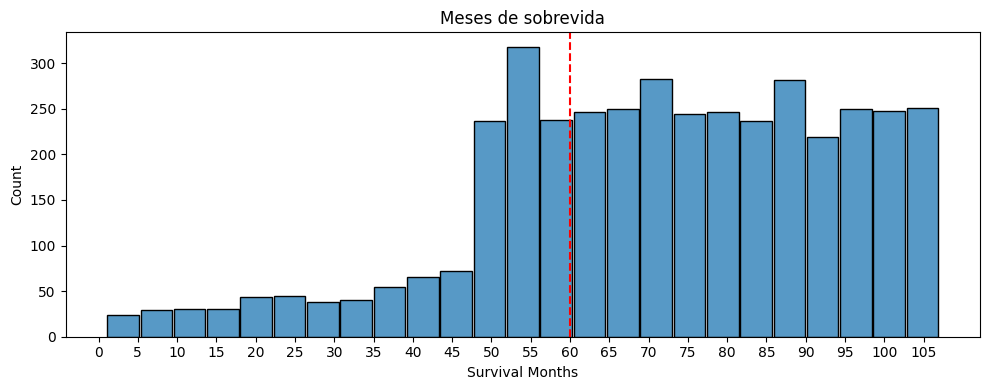

In [20]:
# Histograma survival months

f, axs = plt.subplots(figsize=(10, 4))
sns.histplot(data=df, x="Survival Months", multiple="stack", shrink=.95, legend=True, palette="Set2")
axs.set_title("Meses de sobrevida")
plt.axvline(x=60, color='red', linestyle='--')
plt.xticks(range(0, 110, 5) )
plt.tight_layout()
plt.show()

Histograma donde en el eje X tenemos la cantidad de meses de supervivencia tras el diagnostico y en el eje Y la cantidad de registros. La linea roja punteada marca los 60 meses (5 años).
Se ve que hay mayor volumne de registros de supervivientes de mas de 46 meses. Podria deberse a un sesgo en la toma de muestra?


In [21]:
# Cuantos sobrevivieron mayores de 46 meses
cuaretayseisMAYOR = []
cuarentayseisMENOR = []

for i in df["Survival Months"]:
    if i >= 46:
        cuaretayseisMAYOR.append(i)
    else:
        cuarentayseisMENOR.append(i)

print("<=46:", len(cuaretayseisMAYOR),"\n","<46:",len(cuarentayseisMENOR))

# Cuantos sobrevivieron mayores de 60 meses

sesentaMAYOR = []
sesentaMENOR = []

for i in df["Survival Months"]:
    if i >= 60:
        sesentaMAYOR.append(i)
    else:
        sesentaMENOR.append(i)

print(">=60:", len(sesentaMAYOR),"\n","<60:",len(sesentaMENOR))

# Cuantos sobrevivieron mayores de 60 meses
entre60y46 = []

for i in df["Survival Months"]:
    if i >= 46 and i < 60:
        entre60y46.append(i)

print("entre 46 y 60:","\n",len(entre60y46))

print("mayores a 60 meses:",2821/4024*100,"%","\n","menores a 60 meses:", 1203/4024*100,"%" )

<=46: 3591 
 <46: 433
>=60: 2821 
 <60: 1203
entre 46 y 60: 
 770
mayores a 60 meses: 70.10437375745528 % 
 menores a 60 meses: 29.895626242544733 %


Con este analisis veo cuantos registros sobrevivieron:
- menos de 46 meses: 433 registros,<br>
- entre 46 y 60 meses: 770 registros,<br>
- menos de 60 meses: 1203 registros, 29.9% de la muestra,<br>
- más de 60 meses: 2821 registros, 70.1% de la muestra. <br>

In [22]:

fig_violinplot_sm = px.violin(df, y='Survival Months', title='Survival Months')
fig_violinplot_sm.update_layout(width=600, height=400, title_font_size=20)
fig_violinplot_sm.show()

En este grafico de violin vemos como el grueso de los registros tienen, a grandes razgos, sobrevidas entre 50 y 100 meses.

#### Survival Months vs features

#### SM - 6th Stage

In [23]:
fig_violinplot_sm_6 = px.violin(df,
                                x='6th Stage',
                                y='Survival Months',
                                color='6th Stage',
                                color_discrete_sequence=px.colors.qualitative.Plotly,
                                title='Survival Months - 6th Stage')
fig_violinplot_sm_6.update_layout(width=600, height=400, title_font_size=20)
fig_violinplot_sm_6.show()

In [24]:
fig_violinplot_sm_6_sv = px.violin(df,
                                x='6th Stage',
                                y='Survival Months',
                                color='Sobrevida',
                                color_discrete_sequence=px.colors.qualitative.Plotly,
                                title='Survival Months - 6th Stage')
fig_violinplot_sm_6_sv.update_layout(width=600, height=400, title_font_size=20)
fig_violinplot_sm_6_sv.show()

En estos violines se ve como las categorias de 6th Stage mas altas IIIB y IIIC parecen tener mas volumen en Survival Months menores, mientras que las otras 3 categorias: IIA IIIA y IIB tienen el cuerpo del violin mas definido hacia survival months mas altos.

#### SM - Differentiate

In [25]:
fig_violinplot_sm_d = px.violin(df,
                                x='Differentiate',
                                y='Survival Months',
                                color='Differentiate',
                                color_discrete_sequence=px.colors.qualitative.Plotly,
                                title='Survival Months - Differentiate')
fig_violinplot_sm_d.update_layout(width=600, height=400, title_font_size=20)
fig_violinplot_sm_d.show()

In [26]:
fig_violinplot_sm_d_sv = px.violin(df,
                                x='Differentiate',
                                y='Survival Months',
                                color='Sobrevida',
                                color_discrete_sequence=px.colors.qualitative.Plotly,
                                title='Survival Months - Differentiate')
fig_violinplot_sm_d_sv.update_layout(width=600, height=400, title_font_size=20)
fig_violinplot_sm_d_sv.show()

Si vemos la distribucion de la supervivencia segun los estados de diferenciacion, vemos como los mas indifernciados llegan a tener registros en sobrevidas menores, mientras que los mejor diferenciados se concentran más en sobrevidas mayores.

#### SM - Estrogen Status

In [27]:
fig_violinplot_sm_es = px.violin(df,
                                x='Estrogen Status',
                                y='Survival Months',
                                color='Estrogen Status',
                                color_discrete_sequence=px.colors.qualitative.Plotly,
                                title='Survival Months - Estrogen Status')
fig_violinplot_sm_es.update_layout(width=600, height=400, title_font_size=20)
fig_violinplot_sm_es.show()

In [28]:
fig_violinplot_sm_es_sv = px.violin(df,
                                x='Estrogen Status',
                                y='Survival Months',
                                color='Sobrevida',
                                color_discrete_sequence=px.colors.qualitative.Plotly,
                                title='Survival Months - Estrogen Status')
fig_violinplot_sm_es_sv.update_layout(width=600, height=400, title_font_size=20)
fig_violinplot_sm_es_sv.show()

Para Estrogen status Negative hay un cumulo de observaciones con menores survival months. En cambio los Positive se concentran mas en survival months mayores

#### SM - Progesterone Status

In [29]:
fig_violinplot_sm_ps = px.violin(df,
                                x='Progesterone Status',
                                y='Survival Months',
                                color='Progesterone Status',
                                color_discrete_sequence=px.colors.qualitative.Plotly,
                                title='Survival Months - Progesterone Status')
fig_violinplot_sm_ps.update_layout(width=600, height=400, title_font_size=20)
fig_violinplot_sm_ps.show()

Se observa el mismo fenomeno que para Estrogen Status pero en Progesteron Status es menos abundante la cola de survival months bajos para los Negative.

In [30]:
fig_violinplot_sm_ps_sv = px.violin(df,
                                x='Progesterone Status',
                                y='Survival Months',
                                color='Sobrevida',
                                color_discrete_sequence=px.colors.qualitative.Plotly,
                                title='Survival Months - Progesterone Status')
fig_violinplot_sm_ps_sv.update_layout(width=600, height=400, title_font_size=20)
fig_violinplot_sm_ps_sv.show()

#### Scatter Survival Months vs Age

In [31]:
# edades
fig = px.histogram(df, "Age", color="Sobrevida", marginal="box", hover_data=df.columns, title="Edad segun Sobrevida")
fig.update_layout(width=600, height=400, title_font_size=20)
fig.show()

Aqui vemos como se distribuyen las edades de las pacientes de la muestra, y para aquellas con sobrevida mayor a 60 meses (Sobrevida True, Azul) y menores de 60 meses (Sobrevida False, Rojo).
Las medidas de cada grupo se pueden ver en el hover que permite pyplot express:<br>
Edades en Sobrevida True, Azul: max: 69, min: 30, mediana: 54, Q1: 47, Q3: 61<br>
Edades en Sobrevida False, Rojo: max: 69, min: 30, mediana: 54, Q1: 47, Q3: 62. <br>
Es decir no parece que la edad afecte la variable objetivo Sobrevida ya que ambas muestras tienen casi los mismos parametros.

In [32]:
# scatter de meses de supervivencia vs edad

fig_scatter_sm_age = px.scatter(df,
                                x="Survival Months",
                                y='Age',
                                title='Survival Months vs Age',
                                color="Differentiate",
                                )
fig_scatter_sm_age.update_layout(width=900, height=400, title_font_size=20)
fig_scatter_sm_age.show()

En este scatter de tamaño tumoral segun meses de supervivencia y edad, si bien no es muy claro y se ve mucha acumulacion de puntos en los de sobrevida mayor a 46 meses lo cual dificulata la interpreacion, pareciera que hay mayor densidad de tamaños tumorales altos en comparacion con otros tamaños tumorales en los sobrevivientes menosres de 46 meses. Igualmente no tengo certeza y quedaria para futuras lineas investigar por algun otro metodo esta idea.

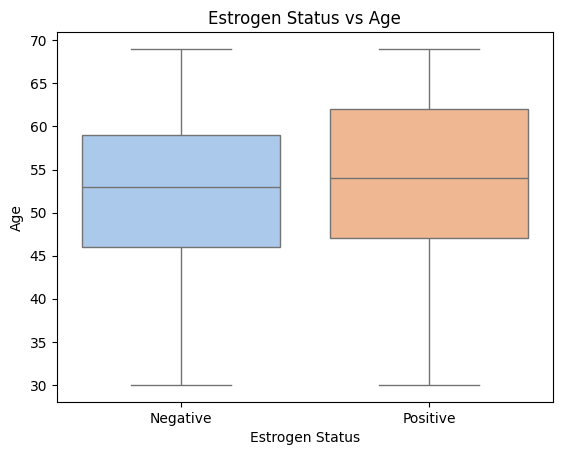

In [33]:
# boxplot estrogen vs age

fig_es_age = sns.boxplot(df, x="Estrogen Status", y='Age', hue="Estrogen Status", palette="pastel").set(title='Estrogen Status vs Age')


En estos boxplot vemos la distribucion de las edades de las pacientes segun sus receptores estrogenicos positivos o negativos. No parece haber grandes diferencias en cuando a la mediana (aprox 44-43) ni los primeros cuartiles (aprox 46), pero si en los tercer cuartiles: mayor de 60 para los positivos y menos de 60 los negativos.

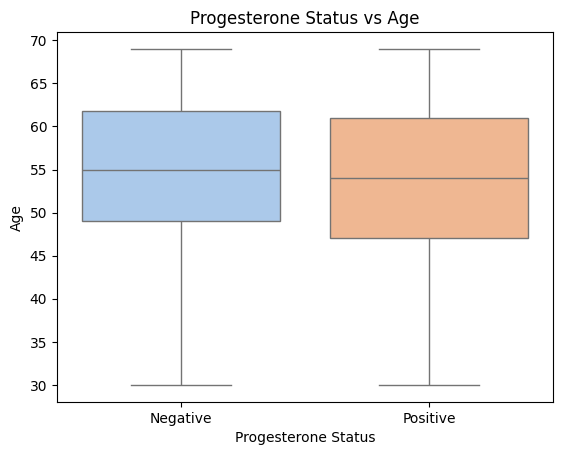

In [34]:
# boxplot progesterone vs age
fig_es_age = sns.boxplot(df, x="Progesterone Status", y='Age', hue="Progesterone Status", palette="pastel").set(title='Progesterone Status vs Age')


Para los receptores de progesterona, parece que la edad es apenas mayor en las pacientes con dichos receptores negativos.

### 6th stage

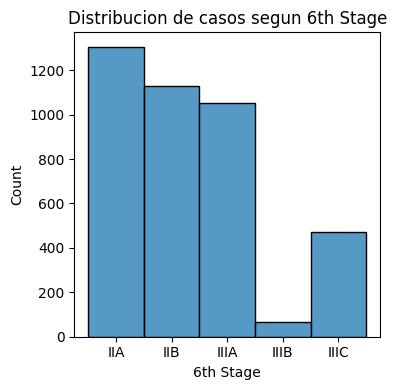

In [35]:
# 6th Stage distribucion

f, axs = plt.subplots(figsize=(4, 4))
sns.histplot(data=df, x="6th Stage", legend=True, palette="Set2",)
axs.set_title("Distribucion de casos segun 6th Stage")
plt.tight_layout()
plt.show()

#axs.set_xticklabels([0, "IIA", "IIIA", "IIB", "IIIB", "IIIC"])

En el histogrma univariado de 6th Stage vemos como se distribuyen los casos segun 6th Stage. La mayoria son de 6th Stage bajo: IIA, IIB, IIIA, seguidos de IIIC y la menor cantidad IIIC.
Debajo veremos la cantidad de cada categoria:

In [36]:
df["6th Stage"].value_counts()

6th Stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64

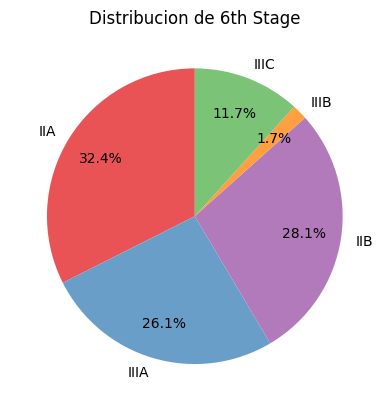

In [37]:
# pie plot 6th stage categories

import matplotlib.pyplot as plt
import numpy as np

valores = np.array([1305, 1050, 1130, 67, 472])
etiquetas = ["IIA", "IIIA","IIB",  "IIIB","IIIC"]
colores = ["#EA5355","#699EC9","#B27ABA","#FF9F40", "#7AC377"]
plt.pie(valores, labels=etiquetas, labeldistance=1.1, autopct='%1.1f%%', pctdistance=0.75, colors=colores, startangle=90, counterclock=True )
plt.title("Distribucion de 6th Stage")
#plt.legend(etiqueta, loc="upper right", bbox_to_anchor=(0.7, 0, 0.5, 1))
plt.show()


En este pieplot se visualiza facilmente como las categorias IIA IIB y IIIA son las predomnantes, con sus respectivos porcentajes del total de observaciones (32.4, 28.1, y 26.1% respectivamente) . Y IIIC y IIB quedan con menor proporcion de casos: 11.7 y 1.7 % repestivamente.

#### 6th Stage vs features

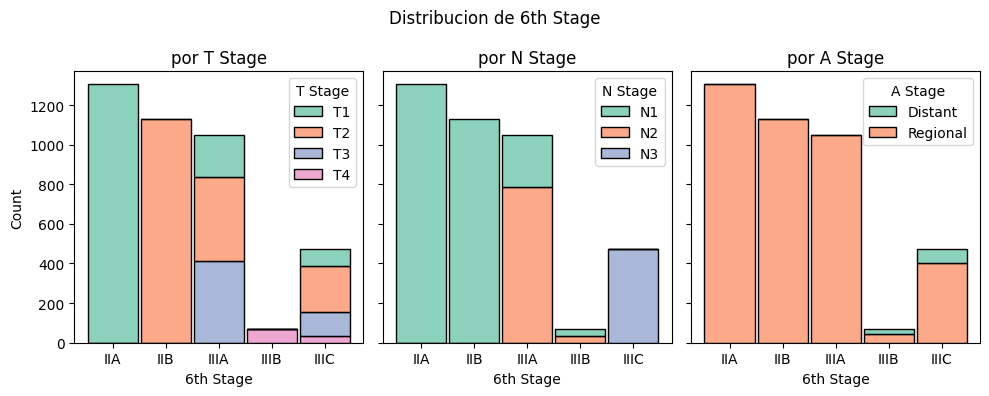

In [38]:
# los 3 analisis juntos de 6th Stage: TNA


fs, axs = plt.subplots(1,3,figsize=(10,4), sharey=True, sharex=True)

TS = sns.histplot(data=df, x="6th Stage", hue="T Stage", multiple="stack", shrink=.95, legend=True, palette="Set2", ax=axs[0]).set_title("por T Stage")
NS = sns.histplot(data=df, x="6th Stage", hue="N Stage", multiple="stack", shrink=.95, legend=True, palette="Set2", ax=axs[1]).set_title("por N Stage")
AS = sns.histplot(data=df, x="6th Stage", hue="A Stage", multiple="stack", shrink=.95, legend=True, palette="Set2", ax=axs[2]).set_title("por A Stage")

fs.suptitle("Distribucion de 6th Stage")
plt.tight_layout()
plt.show()



**T Stage:** <br>
Los pocos T Stage 4 corresponden con las categorias más altas de 6th stage, aunque tambien a T Stage 1 con el 6th Stage más alto.
A su vez, la mayoria de los T Stage 1 corresponden con 6th Stage Bajo.
Los T Stage intermedios 2 y 3 teinen más casos en 6th Stage intermedio bajo pero tambien casos en el mas alto.

**N Stage:**<br>
Los N Stage 3 corresponden todos a 6th Stage 5. Luego, se encuentran los de N Stage 1 en todas las categorias de 6th Stage y los N2 en categorias intermedia baja y alta de 6th Stage.

**A Stage:**<br>
A Stage distant solo corresponde con pocos casos, y estos pertenecen a las categorias de mayor gravedad de 6th Stage

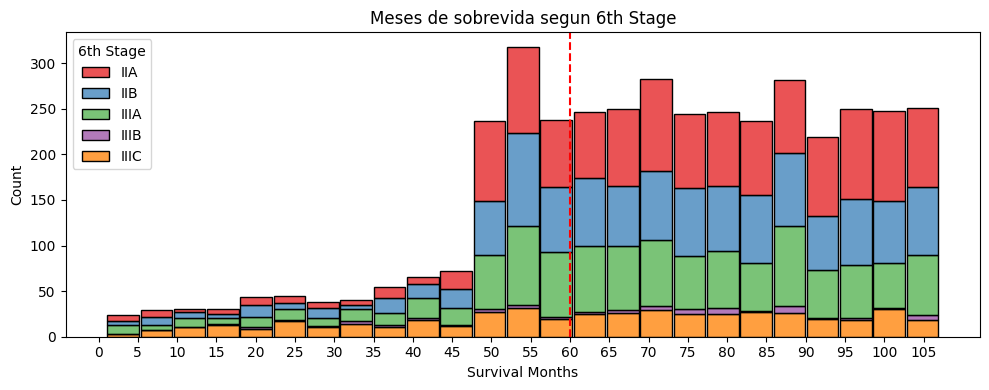

In [39]:
f, axs = plt.subplots(figsize=(10, 4))
sns.histplot(data=df, x="Survival Months", hue="6th Stage", multiple="stack" , shrink=.95, legend=True, palette="Set1")
axs.set_title("Meses de sobrevida segun 6th Stage")
plt.axvline(x=60, color='red', linestyle='--')
plt.xticks(range(0, 110, 5))
plt.tight_layout()
plt.show()

#'layer', 'stack', 'fill', 'dodge'


La cantidad de 6th Stage de mayor gravedad (IIIB, violeta y IIIC, amarillo) parecen mantener la cantidad de casos constante en todos los meses de sobrevida, teniendo tambien mayor proporcion de casos en los de menores meses de supervivencia ya que estos presentan menos casos de 6th IIA, IIIA y IIB los tienen máyor proporción de registros con menores sobrevidas.

### Receptores hormonales

#### HR vs 6th Stage

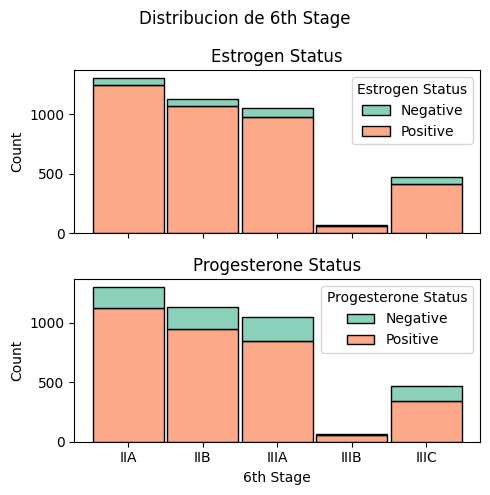

In [40]:
fs, axs = plt.subplots(2,1,figsize=(5,5), sharey=True, sharex=True)

ER = sns.histplot(data=df, x="6th Stage", hue="Estrogen Status", multiple="stack", shrink=.95, legend=True, palette="Set2", ax=axs[0]).set_title("Estrogen Status")
PR = sns.histplot(data=df, x="6th Stage", hue="Progesterone Status", multiple="stack", shrink=.95, legend=True, palette="Set2", ax=axs[1]).set_title("Progesterone Status")

fs.suptitle("Distribucion de 6th Stage")
plt.tight_layout()
plt.show()


Para ambos receptores se ve como la mayoria de las observaciones son positivos para receptores de Estrogenos y de Progesterona. Sin embargo, la proporcion de negativos es mas alta en 6th Stages mas altos.

#### Contingencia Estrogen - Progesterone

Progesterone Status  Negative  Positive
Estrogen Status                        
Negative                  242        27
Positive                  456      3299


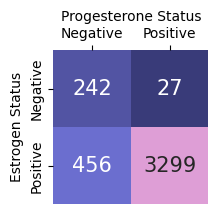

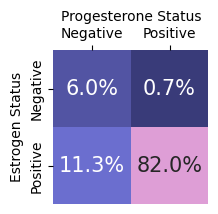

In [41]:
# tabla de contingencia heatmap

# Crear la tabla de contingencia
tabla_contingencia_normalizada = pd.crosstab(df["Estrogen Status"], df["Progesterone Status"], normalize=True) #
tabla_contingencia = pd.crosstab(df["Estrogen Status"], df["Progesterone Status"], normalize=False) #
# Mostrar la tabla de contingencia
print(tabla_contingencia)

# Visualizar con un heatmap
fs, ax = plt.subplots(figsize=(2,2))
ax =sns.heatmap(tabla_contingencia, annot=True, cmap="tab20b", fmt='d',  cbar=False, annot_kws={"size": 15} ) #
ax.set_xlabel('Progesterone Status', loc="center",)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=0)
plt.show()


# Visualizar con un heatmap
fs, ax = plt.subplots(figsize=(2,2))
ax =sns.heatmap(tabla_contingencia_normalizada, annot=True, fmt=".1%", cmap="tab20b",  cbar=False, annot_kws={"size": 15} )
ax.set_xlabel('Progesterone Status', loc="center",)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=0)
plt.show()

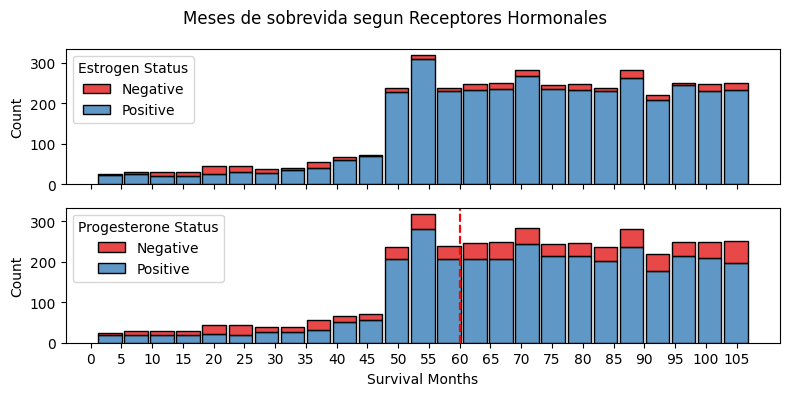

In [42]:
import matplotlib.pyplot as plt

f, axs = plt.subplots(2,1, figsize=(8,4), sharex=True, sharey=True)

sns.histplot(data=df, x="Survival Months", hue="Estrogen Status", multiple="stack", shrink=.9, alpha=0.80, legend=True, palette="Set1", ax=axs[0])
plt.axvline(x=60, color='red', linestyle='--')

sns.histplot(data=df, x="Survival Months", hue="Progesterone Status", multiple="stack", shrink=.9, alpha=0.80, legend=True,palette="Set1", ax=axs[1])
plt.axvline(x=60, color='red', linestyle='--')

f.suptitle("Meses de sobrevida segun Receptores Hormonales")
plt.xticks(range(0, 110, 5))

f.tight_layout()
plt.show()

En la distribución en los meses de supervivenica, ambos muestran menor proporción de negativos en los casos de supervivientes de mas de 46 meses. Esta gráfica también se evidencia que hay más negativos para receptores de progesterona que negativos para receptores de estrógenos.

### Differentiate , survival months

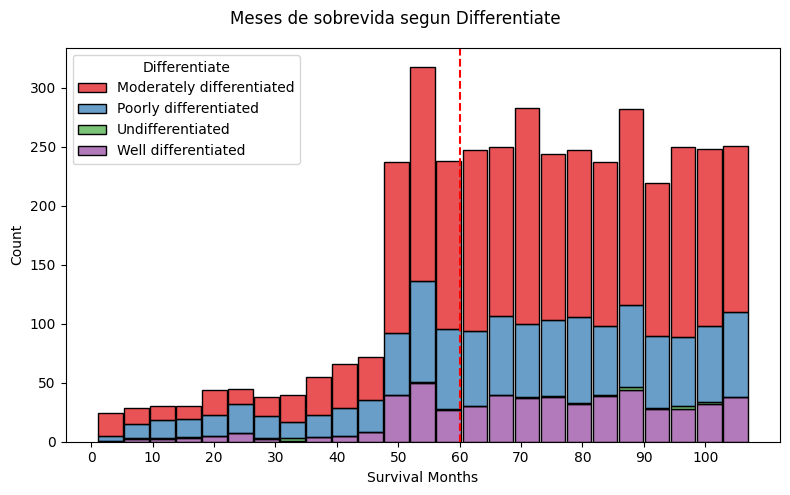

In [43]:
#
f, axs = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x="Survival Months", hue="Differentiate", multiple="stack" , shrink=.95, legend=True, palette="Set1")
plt.axvline(x=60, color='red', linestyle='--')
f.suptitle("Meses de sobrevida segun Differentiate")
plt.xticks(range(0, 110, 10))
plt.tight_layout()
plt.show()

### Differentiate

In [44]:
categoriasDif = df["Differentiate"].value_counts()
categoriasDif

Differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64

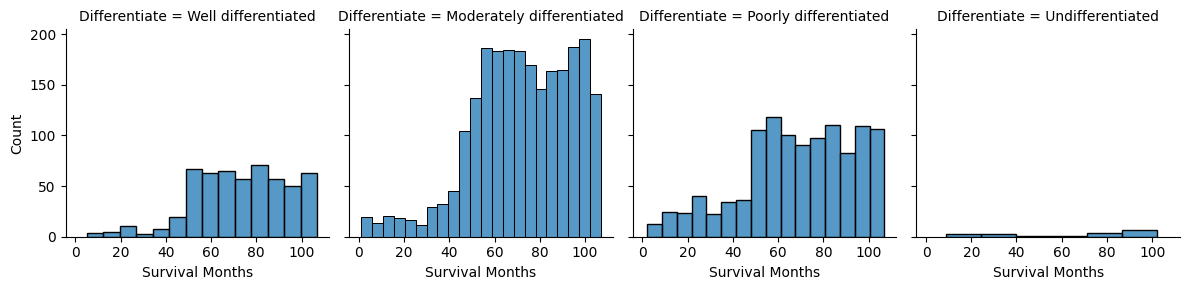

In [45]:
orden_diferentiated = ["Well differentiated","Moderately differentiated","Poorly differentiated","Undifferentiated"]
chart = sns.FacetGrid(df, col='Differentiate', margin_titles=False, aspect=1, col_order=orden_diferentiated)
chart.map(sns.histplot, 'Survival Months', palette="Set1")



La serie de facetados según grado de diferenciación muestra como la mayoría de los registros son de difereciacion moderada. Los pobremente diferenciados parecen tener mayor proporcion en los de supervivencias menores a 46 meses.

### Crosstabs 6th Stage vs Variables

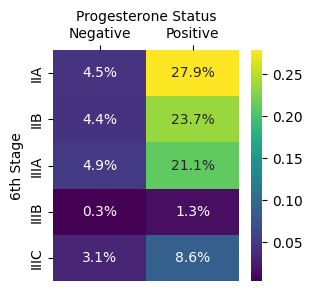

In [46]:
# crosstab Progesterona vs 6th Stage

PS6th = pd.crosstab(df["6th Stage"], df["Progesterone Status"], normalize=True) #Agregamos los valores en relativo

fs, ax = plt.subplots(figsize=(3,3))
ax =sns.heatmap(PS6th, annot=True, cmap="viridis", fmt='.1%', annot_kws={"size": 10}, cbar=True ) #
ax.set_xlabel('Progesterone Status', loc="center",)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=0)
plt.show()

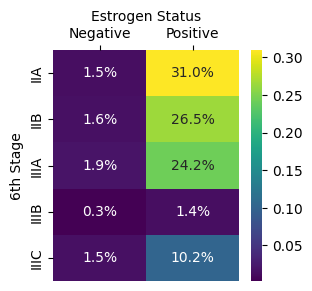

In [47]:
# crosstab Estrogenos vs 6th Stage

ES6th = pd.crosstab(df["6th Stage"], df["Estrogen Status"], normalize=True) #Agregamos los valores en relativo

fs, ax = plt.subplots(figsize=(3,3))
ax =sns.heatmap(ES6th, annot=True, cmap="viridis", fmt='.1%',  cbar=True, annot_kws={"size": 10} ) #
ax.set_xlabel('Estrogen Status', loc="center",)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=0)
plt.show()

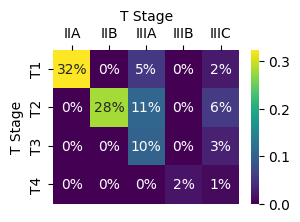

In [48]:
# crosstab T Stage vs 6th Stage

TS6th = pd.crosstab( df["T Stage"],df["6th Stage"], normalize=True) #Agregamos los valores en relativo

fs, ax = plt.subplots(figsize=(3,2))
ax =sns.heatmap(TS6th, annot=True, cmap="viridis", fmt='.0%',  cbar=True, annot_kws={"size": 10} ) #
ax.set_xlabel('T Stage', loc="center",)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=0)
plt.show()

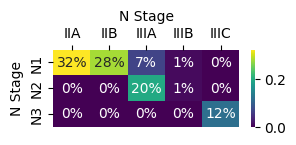

In [49]:
# crosstab N Stage vs 6th Stage

NS6th = pd.crosstab( df["N Stage"],df["6th Stage"], normalize=True) #Agregamos los valores en relativo

fs, ax = plt.subplots(figsize=(3,1))
ax =sns.heatmap(NS6th, annot=True, cmap="viridis", fmt='.0%',  cbar=True, annot_kws={"size": 10} ) #
ax.set_xlabel('N Stage', loc="center",)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=0)
plt.show()

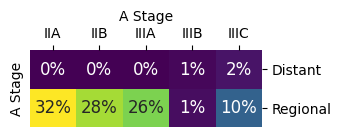

In [50]:
# crosstab A Stage vs 6th Stage

AS6th = pd.crosstab( df["A Stage"],df["6th Stage"], normalize=True) #Agregamos los valores en relativo

fs, ax = plt.subplots(figsize=(3,1))
ax =sns.heatmap(AS6th, annot=True, cmap="viridis", fmt='.0%',  cbar=False, annot_kws={"size": 12} ) #
ax.set_xlabel('A Stage', loc="center",)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.yaxis.tick_right()
plt.yticks(rotation=0)
plt.show()

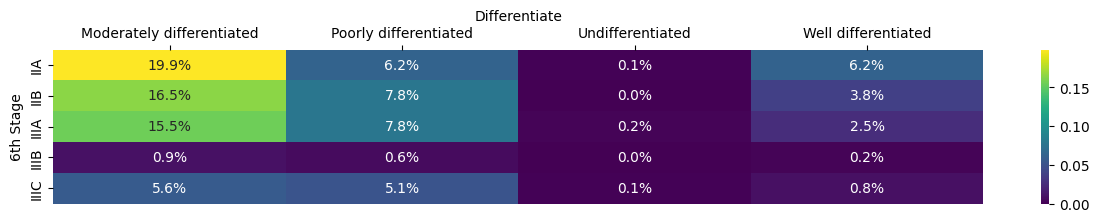

In [51]:
# crosstab Differentiate vs 6th Stage

D6th = pd.crosstab( df["6th Stage"],df["Differentiate"],  normalize=True) #Agregamos los valores en relativo

fs, ax = plt.subplots(figsize=(15,2))
ax =sns.heatmap(D6th, annot=True, cmap="viridis", fmt='.1%',  cbar=True, annot_kws={"size": 10},  ) #
ax.set_xlabel('Differentiate', loc="center",)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')


plt.show()

### ▶ Conclusiones de visualizacion:


* Los meses de supervivencia van de 1 a 107 meses. A partir de los 46 meses aumentan la cantidad de registros. Se ven  1203 registros de supervivencia menor a 60 meses (29.9% de la muestra), y 2821 registros que sobrevivieron más de 60 meses: 70.1% de la muestra. La variable objetivo “Sobrevida” se encuentra desbalanceada.
* Los registros con 6th stage IIA, IIB y IIA, en conjunto representan el 86.6% de la muestra.
* Los 6th Stage de mayor gravedad (IIIB y IIIC), 13.4% de la muestra, tienen máyor proporción de registros con menores sobrevidas.
* Los registros con receptores estrogénicos negativos representan una proporción en supervivencias menores a 50 meses mayor que los positivos. Dicha tendencia se repite en el caso de los receptores de progesterona aunque aquí menos marcado. La proporción de receptores hormonales negativos es mayor en 6th Stages mayores (IIIB y IIIC).
* 82% de los registros tiene ambos receptores hormonales positivos.
* La edad de las pacientes parece ser mayor en los casos de receptores
progestágenos negativos y menor en los de receptores estrogénicos
negativos.


# 🔢 Estandarizacion de variables

Para clasificar las variables se puede usar el codigo:

```
columns = list(df_ml.columns)
categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df_ml[i].unique()) > 5:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

#  salteando la primera columna las otras sis eran las mumericas
numeric_columns = numeric_columns[1:]

print('Numerical features: ', numeric_columns)
print('Categorical features: ', categoric_columns)
```
Asi sabemos que son:

NUMERICAS
  * Age
  * Tumor Size
  * Survival Months
  * Regional Node Examined
  * Regional Node Positive
  * RNP/RNE
<br>

CATEGORICAS <br>
  - NOMINALES <br>
      - Multictegoricas:  <br>
         * Race
      - BINARIAS <br>
         * A Stage
         * Estrogen Status
         * Progesterone Status
         * Sobrevida
  - ORDINALES<br>
    * T Stage
    * N Stage
    * Diffrentiate
    * 6th Stage

 y podemos elegir qué tipo de encoding usar para cada una y cuales requeriran escalarse.

In [52]:
def prepare_my_data(data):  #

        # categoricas ordinales: OrdinalEncoder

        # T Stage
        df_TS = df[['T Stage']].copy()
        encoder = OrdinalEncoder(categories = [['T1', 'T2', 'T3', 'T4']])  # escribir las categorias en el orden que las quiero de manor a mayor, te da in numero float 0, 1, 2
        df_TS['df_TS_encoded'] = encoder.fit_transform(df_TS[['T Stage']]).ravel()
        df_TS[['T Stage','df_TS_encoded']].drop_duplicates()

        # N Stage
        df_NS = df [['N Stage']].copy()
        encoder = OrdinalEncoder(categories = [['N1', 'N2', 'N3']])  # escribir las categorias en el orden que las quiero de manor a mayor, te da in numero float 0, 1, 2
        df_NS['df_NS_encoded'] = encoder.fit_transform(df_NS[['N Stage']]).ravel()
        df_NS[['N Stage','df_NS_encoded']].drop_duplicates()

        # Differentiate
        df_D = df [['Differentiate']].copy()
        encoder = OrdinalEncoder(categories = [['Well differentiated', 'Moderately differentiated', 'Poorly differentiated', 'Undifferentiated']])  # escribir las categorias en el orden que las quiero de manor a mayor, te da in numero float 0, 1, 2
        df_D['df_D_encoded'] = encoder.fit_transform(df_D[['Differentiate']]).ravel()
        df_D[['Differentiate','df_D_encoded']].drop_duplicates()

        # 6th Stage
        df_6S = df [['6th Stage']].copy()
        encoder = OrdinalEncoder(categories = [['IIA', 'IIIA', 'IIB', 'IIIB', 'IIIC']])  # escribir las categorias en el orden que las quiero de manor a mayor, te da in numero float 0, 1, 2
        df_6S['df_6S_encoded'] = encoder.fit_transform(df_6S[['6th Stage']]).ravel()
        df_6S[['6th Stage','df_6S_encoded']].drop_duplicates()

        # categorica no ordinal:

        #Race: label encoder
        LE = LabelEncoder()
        df_R = df['Race']
        df_R = LE.fit_transform(df_R)
        df_R = pd.DataFrame(df_R)
        df_R.value_counts() # veo que whte es 2, other es 1 y Black es 0
        df_R.rename(columns={0: 'Race'}, inplace=True)
        df_R

        # binarias
        df_binarias = df[['A Stage', 'Estrogen Status', 'Progesterone Status', 'Sobrevida']]
        # Aplicar OneHotEncoder
        OHE = OneHotEncoder(sparse_output=False, drop='first')  # Utilizando drop='first' para evitar multicolinealidad
        encoded_binarias = OHE.fit_transform(df_binarias)
        encoded_df = pd.DataFrame(encoded_binarias, columns=OHE.get_feature_names_out(['A Stage', 'Estrogen Status', 'Progesterone Status', 'Sobrevida']))


        # numericas, escalar

        ds = df[['Age','Tumor Size', 'Survival Months', 'Regional Node Examined', 'Regional Node Positive', 'RNP/RNE']].copy()
        scaler = StandardScaler()
        scaler.fit(ds)
        scaled_ds = pd.DataFrame(scaler.transform(ds), columns= ds.columns)

        # Concatenar todo
        df_concatenado = pd.concat([df_6S, df_TS, df_NS, df_D, df_R, encoded_df, scaled_ds], axis=1)
        df_concatenado.drop(columns=['6th Stage', 'T Stage', 'N Stage', 'Differentiate' ], inplace=True)
        df_concatenado.head()

        # cambio los nombres de las columnas asiquedan bonitos
        df_ml = df_concatenado.copy()
        df_ml.rename(columns={'df_6S_encoded': '6th Stage', 'df_TS_encoded': 'T Stage', 'df_NS_encoded': 'N Stage', 'df_D_encoded': 'Differentiate','A Stage_Regional':'A_Stage_Regional' , 'Estrogen Status_Positive': 'Estrogen_Positive',
            'Progesterone Status_Positive': 'Progesterone_Positive', 'Sobrevida_1': 'Sobrevida', 'df_R':'Race'}, inplace=True)

        # para transformar las categoricas encodeadas en enteros en vez de flotantes
        columns = list(df_ml.columns)
        #distinguir categoricas
        categoric_columns = []
        numeric_columns = []
        for i in columns:
          if len(df_ml[i].unique()) > 5:
            numeric_columns.append(i)
          else:
            categoric_columns.append(i)

        #  distinguir numericas, salteando la primera columna las otras si eran las mumericas
        numeric_columns = numeric_columns[1:]

        df_ml[categoric_columns] = df_ml[categoric_columns].astype('int')

        return df_ml# dataset preparado

In [53]:
completo = df.copy()

In [54]:
#Aplico la funcion de encodear y escalar
completo = prepare_my_data(completo)
completo.columns

Index(['6th Stage', 'T Stage', 'N Stage', 'Differentiate', 'Race',
       'A_Stage_Regional', 'Estrogen_Positive', 'Progesterone_Positive',
       'Sobrevida', 'Age', 'Tumor Size', 'Survival Months',
       'Regional Node Examined', 'Regional Node Positive', 'RNP/RNE'],
      dtype='object')

### Matriz de correlacion

In [55]:
completo_limpio = completo.drop(columns=['Survival Months', '6th Stage','Regional Node Examined', 'Regional Node Positive'], axis=1)

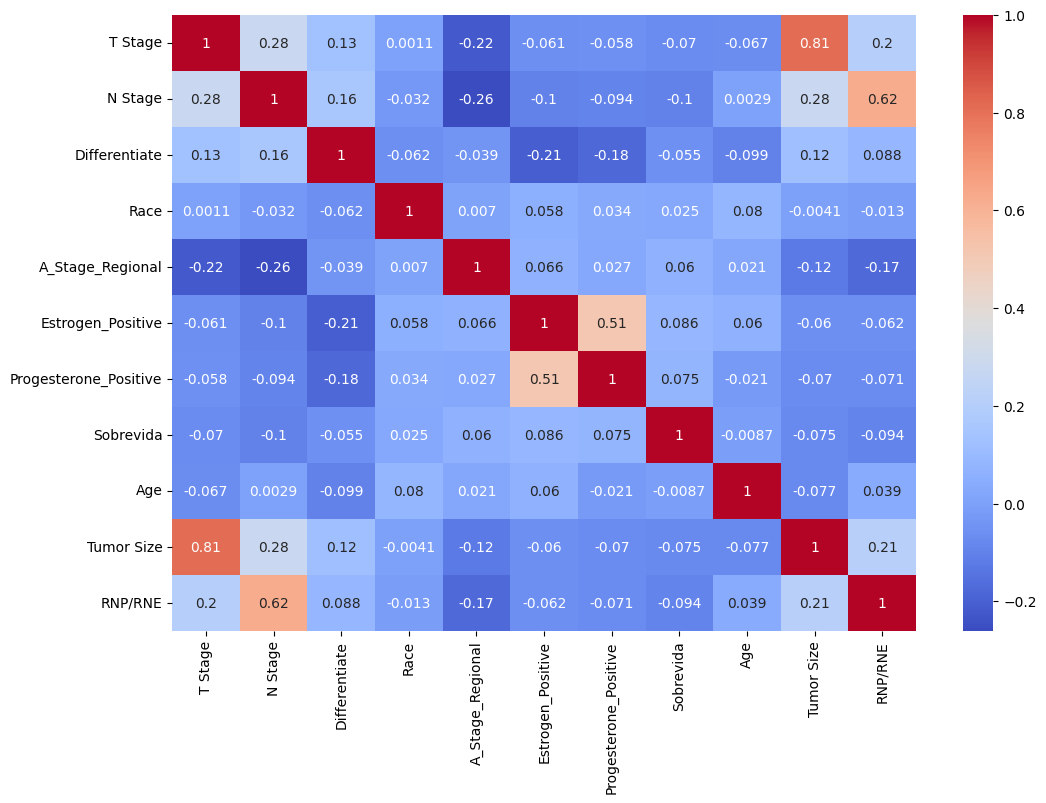

In [56]:
plt.figure(figsize=(12, 8))
sns.heatmap(completo_limpio.corr(), annot = True, cmap = "coolwarm")
plt.show()

En la matriz vemos la fuerza de correlación de las variables. Destacar que: Tumor Size determina el T Stage; el N Stage esta determinado por la cantidad de ganglios positivos (característica que fue utilizada para crear la varable RNP/RNE).

In [57]:
# Calcular la matriz de correlación
corr_matrix = completo_limpio.corr()

# mostrar los coeficientes de correlacoin de la variable Sobrevida>60
corr_matrix['Sobrevida'].sort_values(ascending=False)

Sobrevida                1.000000
Estrogen_Positive        0.086025
Progesterone_Positive    0.075019
A_Stage_Regional         0.059910
Race                     0.025335
Age                     -0.008691
Differentiate           -0.055148
T Stage                 -0.070135
Tumor Size              -0.074578
RNP/RNE                 -0.094465
N Stage                 -0.101491
Name: Sobrevida, dtype: float64

Aqui vemos qué variables se relacionan más estrechamente con la variable objetivo Sobrevida: de manera negativa N Stage y RNP/RNE, y de manera positiva Estrogen_Positive y Progesterone_Positive. <br>

# 🤖 Machine Learning

In [58]:
# las variables independientes ya aca saco las que no voy a querer usar:
X = completo.drop(columns=['Sobrevida','Survival Months', '6th Stage','Regional Node Examined', 'Regional Node Positive'], axis=1) # luego de una primera version que contenia los RNE y RNP se decide quitarlas ya que están resumidas en RNP/RNE
y = completo['Sobrevida'] # la target feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 42)
# luego dentro del test con SKF va a haber tandas de validacion

In [59]:
# arme dataframes de cada set de entrenamiento y el test
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1) # este va a ser el ultemate test cuando tenga el modelo elegido con sus hiperparametros


In [60]:
train.shape, test.shape

((3219, 11), (805, 11))

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3219 entries, 2391 to 3261
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   T Stage                3219 non-null   int64  
 1   N Stage                3219 non-null   int64  
 2   Differentiate          3219 non-null   int64  
 3   Race                   3219 non-null   int64  
 4   A_Stage_Regional       3219 non-null   int64  
 5   Estrogen_Positive      3219 non-null   int64  
 6   Progesterone_Positive  3219 non-null   int64  
 7   Age                    3219 non-null   float64
 8   Tumor Size             3219 non-null   float64
 9   RNP/RNE                3219 non-null   float64
 10  Sobrevida              3219 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 301.8 KB


## Modelos de clasificacióm

Como mi hipotesis es un problema de clasificación selecciono los modelos a probar:

  - Logistic Regression
  - Random Forest
  - Support Vector Machine (SVM)
  - LightGBM
  

Para cada modelo a probar, se usará validación cruzada usando metodo **Stratified K Fold** ya que la target feature (Sobrevida) está desbalanceada (aproximadmente 70-30%). <br>
Se corrieron con el numero de itraciones entre 3 y 6 manualmente, obteniendo mejores metricas en 4.
En general, Stratified K-Fold tiende a ser más robusto y menos sesgado que la validación simple. El sesgo es menor ya que el modelo se entrena y evalúa en diferentes particiones, lo que proporciona una visión más completa del rendimiento. La variabilidad se reduce tambien, porque en las 4 iteraciones se llega a un desempeño mas estable, minimizando el impacto de una sola division específica que podria ser atípica.
<br>

Como metodo de búsqueda de hiperparámetros se elige **Halving Randomized Search Cross Validation** ya que presenta alta precisión, menor costo computacional y menor probabilidad de cometer overfitting.

<br>

Es de interés **disminuir los falsos positivos**, es decir el error tipo 1, que en mi problema sería decir que sobrevivirá más de 60 meses, pero que la paciente muera antes. <br>
Si aumento mi True Positive Rate (**Recall**), y si tuviera un **roc-auc-score alto**, estaría disminuyendo el False Positive Rate. Por lo que como métricas de evaluación estré midiendo principalemnte estas dos métricas mencionadas.

In [62]:
# instancio mis 4 modelos de clasificación modelos

log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(probability=True, random_state=42) # sin el probability true no deja despues hacer el .predict_proba para auc-roc
lgbm = lgb.LGBMClassifier(objective='binary', metric="auc", random_state=42) #(boosting_type='gbdt', num_leaves=31, learning_rate=0.05, n_estimators=100)



In [63]:
# grillas de hiperparametros para cada modelo

# param grid log_reg
params_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],  # elige solvers que admiten regularización L1 y L2
    'max_iter': [100, 200, 500],
    'penalty': ['l1', 'l2', 'elasticnet', None]  # pruebas con regularización
    }

# params grid rf
params_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# params grid svm
params_svm = {
    'C':[1,10], # (el codigo que habia encontrado usaba tambien 100, 1000, pero me tardaria mucho entonces los saque)
    'gamma':[1,0.1,0.001,0.0001],
    'kernel':['linear','rbf']
    }

# params grid lgbm
params_lgbm = {
    'num_leaves': [20, 31, 40, 50],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150, 200],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
    }


# 🏋 Entrenamiento y evaluación de modelos con Stratified K Fold y busqueda de hiperparametros con HalvingRandoSearch

In [64]:
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingRandomSearchCV

In [65]:
# instancio el cross validation Stratified K Fold

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42) # permite ponerle el shuffle y random state,
#skf.get_n_splits(X_train, y_train)
#train, test = list(skf.split(X_train, y_train))[0]


In [66]:
#entrenamientos y evaluacion de modeloos con Stratified K fold y busqueda de hiperparametros con HalvingRandoSearch

##### Regresion Logistica

In [67]:
#log_reg
search_log_reg = HalvingRandomSearchCV(log_reg, params_log_reg, cv=skf, factor=2, scoring='roc_auc', random_state=42, n_jobs=-1) # instancio el buscador de hiperparametros para mi modelo (en este caso el regresion logistica) con la grilla que hice para él y par aque el score que optimice sea el roc_auc, con el cv=skf definido arroba en Stratified K Fold Cross Validation
search_log_reg.fit(X_train, y_train) # aplico el metodo a mis datos

best_model_log_reg = search_log_reg.best_estimator_ # obtener el modelo con sus mejores hiperparametos para el scoring elegido

y_pred_proba_log_reg = best_model_log_reg.predict_proba(X_train)[:, 1] # para luego poder calcular el roc_auc_score
roc_auc_log_reg = roc_auc_score(y_train, y_pred_proba_log_reg)

y_pred_log_reg = best_model_log_reg.predict(X_train) # para luego obtener las metricas de clasificacion: recall y luego las demas accuracy, precision f1..
recall_log_reg = recall_score(y_train, y_pred_log_reg)

print(f"Classification Report for Logistic Regression :\n", classification_report(y_train, y_pred_log_reg))
print(f" RocAuc Score Logistic Regression: ", roc_auc_log_reg)
print(f"Best Model Logistic Regression:", best_model_log_reg)
search_log_reg.best_params_ # para chequear que sean como los que indica el best_model

Classification Report for Logistic Regression :
               precision    recall  f1-score   support

           0       0.64      0.04      0.07       962
           1       0.71      0.99      0.83      2257

    accuracy                           0.71      3219
   macro avg       0.67      0.51      0.45      3219
weighted avg       0.69      0.71      0.60      3219

 RocAuc Score Logistic Regression:  0.576750824646261
Best Model Logistic Regression: LogisticRegression(C=0.1, max_iter=200, penalty=None, random_state=42,
                   solver='saga')


{'solver': 'saga', 'penalty': None, 'max_iter': 200, 'C': 0.1}

##### Random Forest

In [68]:
#random forest
search_rf = HalvingRandomSearchCV(rf, params_rf, cv=skf, factor=2, scoring='roc_auc', random_state=42, n_jobs=-1)
search_rf.fit(X_train, y_train)

best_model_rf = search_rf.best_estimator_

y_pred_proba_rf = best_model_rf.predict_proba(X_train)[:, 1]
roc_auc_rf = roc_auc_score(y_train, y_pred_proba_rf)

y_pred_rf = best_model_rf.predict(X_train)
recall_rf = recall_score(y_train, y_pred_rf)

print(f"Classification Report for Random Forest :\n",classification_report(y_train, y_pred_rf))
print(f" RocAuc Score Random Forest: ", roc_auc_rf)
print(f"Best Model Random Forest:", best_model_rf)
search_rf.best_params_ # para chequear que sean como los que indica el best_model

Classification Report for Random Forest :
               precision    recall  f1-score   support

           0       0.96      0.24      0.38       962
           1       0.75      1.00      0.86      2257

    accuracy                           0.77      3219
   macro avg       0.86      0.62      0.62      3219
weighted avg       0.81      0.77      0.72      3219

 RocAuc Score Random Forest:  0.9217818070277086
Best Model Random Forest: RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200, random_state=42)


{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 15}

##### Support Vector Machine Classifier

In [69]:
#svm
search_svm = HalvingRandomSearchCV(svm, params_svm, cv=skf, factor=2, scoring='roc_auc', random_state=42, n_jobs=-1)
search_svm.fit(X_train, y_train)

best_model_svm = search_svm.best_estimator_

y_pred_proba_svm = best_model_svm.predict_proba(X_train)[:, 1]
roc_auc_svm = roc_auc_score(y_train, y_pred_proba_svm)

y_pred_svm = best_model_svm.predict(X_train)
recall_svm = recall_score(y_train, y_pred_svm)

print(f"Classification Report for SVM :\n",classification_report(y_train, y_pred_svm))
print(f" RocAuc Score SVM: ", roc_auc_svm)
print(f"Best Model SVM:", best_model_svm)
search_svm.best_params_ # para chequear que sean como los que indica el best_model

Classification Report for SVM :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       962
           1       0.70      1.00      0.82      2257

    accuracy                           0.70      3219
   macro avg       0.35      0.50      0.41      3219
weighted avg       0.49      0.70      0.58      3219

 RocAuc Score SVM:  0.5580886260992597
Best Model SVM: SVC(C=10, gamma=0.0001, kernel='linear', probability=True, random_state=42)


{'kernel': 'linear', 'gamma': 0.0001, 'C': 10}

##### Light Gradient-Boosting Machine

In [70]:
#lgbm
search_lgbm = HalvingRandomSearchCV(lgbm, params_lgbm, cv=skf, factor=2, scoring='roc_auc', random_state=42, n_jobs=-1);
search_lgbm.fit(X_train, y_train);

best_model_lgbm = search_lgbm.best_estimator_

y_pred_proba_lgbm = best_model_lgbm.predict_proba(X_train)[:, 1]
roc_auc_lgbm = roc_auc_score(y_train, y_pred_proba_lgbm)

y_pred_lgbm = best_model_lgbm.predict(X_train)
recall_lgbm = recall_score(y_train, y_pred_lgbm)

print(f"Classification Report for Light gbm :\n",classification_report(y_train, y_pred_lgbm))  # y_true es la variable con las etiquetas verdaderas
print(f" RocAuc Score Light gbm: ", roc_auc_lgbm)
print(f"Best Model Light gbm:", best_model_lgbm)
best_model_lgbm.get_params() # para chequear que sean como los que indica el best_model

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2257, number of negative: 962
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 3219, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.701149 -> initscore=0.852777
[LightGBM] [Info] Start training from score 0.852777
Classification Report for Light gbm :
               precision    recall  f1-score   support

           0       0.90      0.27      0.42       962
           1       0.76      0.99      0.86      2257

    accuracy                           0.77      3219
   macro avg       0.83      0.63      0.64      3219
weighted avg       0.80      0.77      0.73      3219

 Ro

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.6,
 'importance_type': 'split',
 'learning_rate': 0.2,
 'max_depth': -1,
 'min_child_samples': 10,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'num_leaves': 20,
 'objective': 'binary',
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'metric': 'auc'}

## Conclusiones de modelado

 *Referencia:<br>
Clase Minoritaria: Sobrevida 0 (no sobrevivieron mas de 60 meses) <br>
Clase Mayoritaria: Sobrevida 1 (sobrevivieron más de 60 meses)*

In [71]:
# tabla de recall y roc auc

modelos = ["Regresion Logistica", "Random Forest", "SVM", "Light GBM"]
roc_auc_hrscv = [roc_auc_log_reg, roc_auc_rf, roc_auc_svm, roc_auc_lgbm]
recall_hrscv = [recall_log_reg, recall_rf, recall_svm, recall_lgbm]

resultados_hrscv_skf = pd.DataFrame({'Modelo': modelos, 'Recall': recall_hrscv, 'RocAuc': roc_auc_hrscv})
resultados_hrscv_skf.round(3)

Modelo  Recall  RocAuc
0  Regresion Logistica   0.991   0.577
1        Random Forest   0.996   0.922
2                  SVM   1.000   0.558
3            Light GBM   0.987   0.848

**Consideraciones de la evaluacion de modelos:**<br>
<br>
REGRESION LOGISTICA <br>
  - Recall para la clase 1 es excelente (0.99), pero el recall para la clase 0 es muy bajo (0.04), lo que indica que el modelo tiene problemas para identificar correctamente las instancias de la clase 0.<br>
  - ROC-AUC es bajo (0.577), lo que sugiere que el modelo no está diferenciando bien entre las clases.<br>
<br>

RANDOM FOREST <br>
  -Recall para la clase 1 es perfecto (1.00), pero el recall para la clase 0 es bajo (0.24), lo que significa que el modelo tiene dificultades para identificar instancias de la clase 0. <br>
  -  ROC-AUC es alto (0.922), lo que indica que el modelo tiene una excelente capacidad para distinguir entre las clases.<br>
<br>

SUPORT VECTOR MACHINE CLASIFICATORIO<br>
  - Recall para la clase 1 es alto (1.00), pero el modelo no identifica ninguna instancia de la clase 0 (recall de 0.00). <br>
  - ROC-AUC es bajo (0.558), lo que sugiere que el modelo no es efectivo en la diferenciación entre clases. <br>
<br>

LIGHT GMB<br>
  -Recall para la clase 1 es alto (0.99), pero el recall para la clase 0 es bajo (0.27), lo que indica que el modelo tiene dificultades para identificar instancias de la clase 0.<br>
  - ROC-AUC es bastante alto (0.848), lo que indica que el modelo tiene una buena capacidad para distinguir entre las clases.<br>

**Conclusión:**<br>

Mejor Modelo según ROC-AUC: <br>
Random Forest (0.9218) tiene el mejor ROC-AUC, lo que indica que es el modelo más capaz de distinguir entre las clases.<br>

Mejor Modelo según Recall: <br>
Aunque todos los modelos tienen un alto recall para la clase 1, Random Forest también se destaca en esta métrica con un recall perfecto (1.00) para predecir que la paciente sobrevive mas de 60 meses, aunque su recall para predecir que no sobrevivirá ese tiempo es bajo.<br>

<br>

Random Forest es el modelo más equilibrado y efectivo para mi problema, considerando tanto la capacidad de discriminación (ROC-AUC) como la identificación de las pacientes que soreviven mas de 50 meses (recall). Sin embargo, habria que trabajar para mejorar recall de la clase 0. Podría requerir ajustes adicionales o técnicas de balanceo de clases.

### Guardo mi mejor modelo Random Forest

In [72]:
# Miscellaneous
import pickle #para almacenar modelo comprimido
import os
import joblib # para piplines y guardar modeos

In [73]:
def save_model(self, filename):  # guardar modelos
 """Guarda un modelo en disco"""
 if self:
  with open(filename, 'wb') as f:
    pickle.dump(self, f)
  print(f"Modelo guardado como {filename}")


In [74]:

save_model(best_model_rf, 'best_model_rf.pkl')

Modelo guardado como best_model_rf.pkl


Ahora veré como se abriría...

In [75]:
# staticmethod
def load_model(filename):  # cargar modelos
   """Carga un modelo desde disco"""
   with open(filename, 'rb') as f:
    return pickle.load(f)

In [76]:
mi_mejor_modelo = load_model('best_model_rf.pkl')

In [77]:
mi_mejor_modelo

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200, random_state=42)

# 🌲🏃 Deeper into Random Forest

### Feature Importance

El resultado de feature importance en random forest refleja la contribución promedio de cada característica a las decisiones del modelo.
El número asociado a cada variable en la feature importance representa la contribución relativa de esa característica a la predicción del modelo.
se basa en la reducción de la impureza de Gini o el decremento de entropía a lo largo de los árboles del bosque. Cada vez que una característica se usa para dividir un nodo, se calcula cuánto reduce la impureza (por ejemplo, el índice de Gini) en ese nodo. La suma de estas reducciones para una característica particular, promediada en todos los árboles, proporciona una medida de su importancia.

In [78]:
# Feature importance del Random Forest,
fimp_rf = pd.Series(data = best_model_rf.feature_importances_, index=X.columns).sort_values(ascending=True)

import plotly.express as px

fig = px.bar(
    x=fimp_rf.values,
    y=fimp_rf.index,
    orientation='h',
    title="My Random Forest Model"
    )

# Ajustar el tamaño de la figura
fig.update_layout(width=800,height=400,xaxis_title='Gini Importance',yaxis_title='Features')

fig.show()

In [79]:
display(round(fimp_rf,2).sort_values(ascending=False))

RNP/RNE                  0.28
Age                      0.25
Tumor Size               0.24
Differentiate            0.06
N Stage                  0.05
T Stage                  0.04
Progesterone_Positive    0.03
Race                     0.03
Estrogen_Positive        0.02
A_Stage_Regional         0.01
dtype: float64

Las variables con mayor importancia en este Random Forest son:
  - RNP/RNE
  - Age
  - Tumor Size

### Matriz de confucion del Random Forest en el entrenamiento

Confusion Matrix for Random Forest:
 [[ 228  734]
 [  10 2247]]


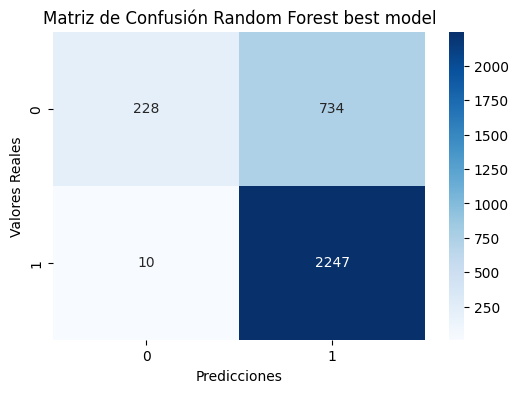

In [80]:
# Generar la matriz de confusión del train RF
conf_matrix_rf = confusion_matrix(y_train, y_pred_rf)
print("Confusion Matrix for Random Forest:\n", conf_matrix_rf)


# Visualizar matriz de confusión
plt.figure(figsize=(6, 4))
# Pass the calculated confusion matrix to heatmap instead of the function name
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusión Random Forest best model')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

El modelo clasifica correctamente 228 instancias de las pacientes que no sobreviven, pero clasifica 734 como que si sobreviven mas de 60 meses. Lo que si, identifica todas las instancias de las pacientes que sobreviven mas de 60 meses correctamente (2247).

### Curva Roc_Auc del train

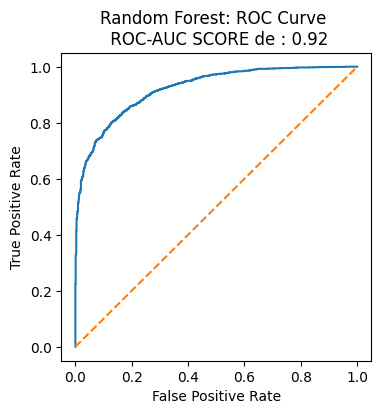

In [81]:
# Roc AUC Curve Train set
y_pred_proba_rf = best_model_rf.predict_proba(X_train)[:, 1]
roc_auc_rf = roc_auc_score(y_train, y_pred_proba_rf)


fpr,tpr,theshold = roc_curve(y_train, y_pred_proba_rf)
fig, ax = plt.subplots(figsize=(4, 4))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title(f"Random Forest: ROC Curve \n ROC-AUC SCORE de : {round(roc_auc_score(y_train, y_pred_proba_rf),2)}")
plt.plot([0, 1], ls="--")

In [82]:
 # Encuentra la fila con el TPR más cercano a 0.92

tabla = pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'Threshold': theshold})

fila_cercana = tabla.iloc[(tabla['TPR'] - 0.92).abs().argmin()]

# Muestra el FPR correspondiente
fpr_correspondiente = round(fila_cercana['FPR'],2)
print(f"El FPR correspondiente a un TPR de 0.92 es: {fpr_correspondiente}")

El FPR correspondiente a un TPR de 0.92 es: 0.3


En el grafico de curva Roc se ve como el Random Forest (linea azul) es mejor que un modelo que haga predicciones al azar acerca de la sobrevida de las mujeres con cancer de mama (la linea verde punteada).
Con el TPR (Recall) de 0.92, el FPR, la probabilidad de error tipo 1, en el modelo es de 3%.

# 🛫 Implementación del mejor modelo de Random Forest en mi set de Testeo:

Recordando... teniamos:


```
# las variables independientes ya aca saco las que no voy a querer usar:
X = completo.drop(columns=['Sobrevida','Survival Months', '6th Stage','Regional Node Examined', 'Regional Node Positive'], axis=1) # luego de una primera version que contenia los RNE y RNP se decide quitarlas ya que están resumidas en RNP/RNE
y = completo['Sobrevida'] # la target feature

X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 42)


# arme dataframes de cada set de entrenamiento y el test
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_Test, y_Test], axis=1) # este va a ser el ultemate test cuando tenga el modelo elegido con sus hiperparametros
```

El modelo con los datos del test

In [83]:
# predicciones de set testeo usando el mejor modelo

y_pred_rf_test = best_model_rf.predict(X_test)
y_pred_proba_rf_test = best_model_rf.predict_proba(X_test)[:, 1]

In [84]:
# metricas del modelo con los datos de testeo

recall_rf_test = recall_score(y_test, y_pred_rf_test)
roc_auc_rf_test = roc_auc_score(y_test, y_pred_proba_rf_test)


print(f"Classification Report for Random Forest test :\n",classification_report(y_test, y_pred_rf_test))  # y_true es la variable con las etiquetas verdaderas
print(f"Recall en prueba: {recall_rf_test:.4f}")
print(f" RocAuc Score Random Forest test: ", roc_auc_rf_test)


Classification Report for Random Forest test :
               precision    recall  f1-score   support

           0       0.44      0.08      0.13       241
           1       0.71      0.96      0.81       564

    accuracy                           0.69       805
   macro avg       0.58      0.52      0.47       805
weighted avg       0.63      0.69      0.61       805

Recall en prueba: 0.9574
 RocAuc Score Random Forest test:  0.5670337835849445


### Matriz de confucion del Random Forest en el testeo

Confusion Matrix for Random Forest Testeo:
 [[ 19 222]
 [ 24 540]]


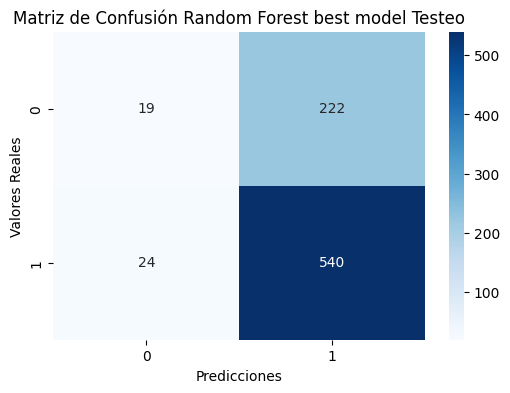

In [85]:
# Generar la matriz de confusión del test RF
conf_matrix_rf_test = confusion_matrix(y_test, y_pred_rf_test)
print("Confusion Matrix for Random Forest Testeo:\n", conf_matrix_rf_test)


# Visualizar matriz de confusión
plt.figure(figsize=(6, 4))
# Pass the calculated confusion matrix to heatmap instead of the function name
sns.heatmap(conf_matrix_rf_test, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusión Random Forest best model Testeo')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()



En el conjunto de prueba, el modelo clasifica solo 19 instancias de las paciente sque no sobreviven 60 meses correctamente, mientras que 222 son clasificadas incorrectamente como que sí sobreviven (alto error tipo 1, FPR). De las pacientes con sobrevida mayor de 60 meses, clasifica correctamente 541 e incorrectamente 23. Esto muestra una disminución significativa en la capacidad del modelo para identificar la clase 0, con respecto al modelo de entrenamiento.

### Curva Roc_Auc del test

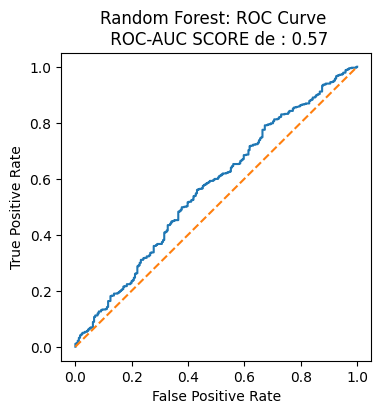

In [86]:
#Roc AUC curve Test

fpr,tpr,theshold = roc_curve(y_test, y_pred_proba_rf_test)
fig, ax = plt.subplots(figsize=(4, 4))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title(f"Random Forest: ROC Curve \n ROC-AUC SCORE de : {round(roc_auc_score(y_test, y_pred_proba_rf_test),2)}")
plt.plot([0, 1], ls="--")

Aqui se evidencia el score bajo de Roc Auc en el conjunto de testeo. Con 0,57, apenas difiere de las predicciones de un modelo que predice al azar entre si las pacientes sobreviviran mas de 60 meses o no.

# 🤼 Comparación del modelo en entrenamiento y testeo


 *Referencia:<br>
Clase Minoritaria: Sobrevida 0 (no sobrevivieron mas de 60 meses) <br>
Clase Mayoritaria: Sobrevida 1 (sobrevivieron más de 60 meses)*

In [87]:
# Tabla comparativa de reportes declasificacion de train y test, y sus roc_auc scores

# Obtener el reporte de clasificación para entrenamiento
report_train = classification_report(y_train, y_pred_rf, output_dict=True)
# Obtener el reporte de clasificación para prueba
report_test = classification_report(y_test, y_pred_rf_test, output_dict=True)

# Calcular accuracy
accuracy_train = accuracy_score(y_train, y_pred_rf)
accuracy_test = accuracy_score(y_test, y_pred_rf_test)

# Crear un DataFrame para las métricas de entrenamiento
metrics_train = {
    'Metricas': ['Precision (0)', 'Recall (0)', 'F1-Score (0)',
                 'Precision (1)', 'Recall (1)', 'F1-Score (1)', 'Accuracy',
                 'ROC AUC'],
    'Entrenamiento': [
        report_train['0']['precision'],
        report_train['0']['recall'],
        report_train['0']['f1-score'],
        report_train['1']['precision'],
        report_train['1']['recall'],
        report_train['1']['f1-score'],
        accuracy_train,
        roc_auc_score(y_train, best_model_rf.predict_proba(X_train)[:, 1])

    ]
}

# Crear un DataFrame para las métricas de prueba
metrics_test = {
    'Metricas': ['Precision (0)', 'Recall (0)', 'F1-Score (0)',
                 'Precision (1)', 'Recall (1)', 'F1-Score (1)', 'Accuracy',
                 'ROC AUC'],
    'Test': [
        report_test['0']['precision'],
        report_test['0']['recall'],
        report_test['0']['f1-score'],
        report_test['1']['precision'],
        report_test['1']['recall'],
        report_test['1']['f1-score'],
        accuracy_test,
        roc_auc_score(y_test, best_model_rf.predict_proba(X_test)[:, 1])
      ]}

# Convertir los diccionarios en DataFrames
df_train = pd.DataFrame(metrics_train)
df_test = pd.DataFrame(metrics_test)

# Unir los DataFrames de entrenamiento y prueba
metrics_df = pd.merge(df_train, df_test, on='Metricas')

# Mostrar la tabla final
display(metrics_df)

Metricas  Entrenamiento      Test
0  Precision (0)       0.957983  0.441860
1     Recall (0)       0.237006  0.078838
2   F1-Score (0)       0.380000  0.133803
3  Precision (1)       0.753774  0.708661
4     Recall (1)       0.995569  0.957447
5   F1-Score (1)       0.857961  0.814480
6       Accuracy       0.768872  0.694410
7        ROC AUC       0.921782  0.567034

**Análisis Comparativo** <br>

La diferencia de aproximadamente 8% entre el accuracy de train (0.77) y test (0.69) puede ser una señal de overfitting: el modelo parece haber aprendido bien las características del conjunto de entrenamiento, pero su rendimiento disminuye en el testeo.<br>

En el conjunto de test, el recall se reduce (de 0.24 en el train) a 0.08. Además, la precision baja, de un 0.96 en el train, a 0.44. Esto sugiere que el modelo tiene dificultades para identificar correctamente las instancias de la clase 0 en datos no vistos, lo que puede ser un signo de sobreajuste.<br>


El ROC-AUC Score en el conjunto de entrenamiento es alto (0.9218), lo que indica que el modelo tiene una excelente capacidad para distinguir entre las clases en los datos de entrenamiento.
Sin embargo, el ROC-AUC Score en el conjunto de test es de 0.5670, lo que indica que el modelo no generaliza bien a nuevos datos. Esto puede significar que el modelo está oberfitteado.

### Curvas Roc_Auc

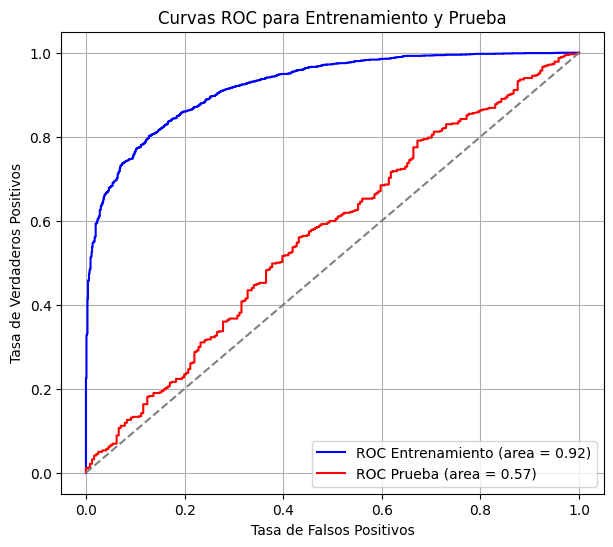

In [88]:
# Grafico de curvas Roc

# Entrenamiento
y_pred_proba_rf_train = best_model_rf.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_rf_train)
roc_auc_train = roc_auc_score(y_train, y_pred_proba_rf_train)

# Prueba
y_pred_proba_rf_test = best_model_rf.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_rf_test)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_rf_test)


plt.figure(figsize=(7, 6))
plt.plot(fpr_train, tpr_train, color='blue', label='ROC Entrenamiento (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, color='red', label='ROC Prueba (area = {:.2f})'.format(roc_auc_test))

# Añadir línea diagonal (random classifier)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

# Etiquetas y título
plt.title('Curvas ROC para Entrenamiento y Prueba')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Al observar las curvas ROC y sus áreas bajo la curva (AUC), se ve la capacidad del modelo para discriminar entre las clases 0 y 1 en los conjuntos de train y test. La curva del conjunto train alcanza bastante bien la esquina superior izquierda, indicando un buen rendimiento: alta tasa de verdaderos positivos y baja tasa de falso positivos. En cambio, la curva del conjunto de testeo, muestra un rendimiento peor. Esto podria ser por que el modelo esté sobreajustado y que tiene dificultades para generalizar a datos no vistos, (nuevos, los del set de testeo).

# 🥠 Futuras lineas para mejorar el modelo:


<br>
Dado el recaimiento de mis metricas especialmente la RocAuc en el conjunto de testeo, consulto qué medidas podrian tomarse para mejorar el modelo, obteniendo las siguientes sugerencia (a demas de la de implementar Stratified K fold, que ya he utilizado en este trabajo):
<br>
<br>
Para mejorar el recall de la clase 0 en un modelo de Random Forest sin comprometer el recall de la clase 1 o el ROC AUC, se pueden implementar varias técnicas de ajuste y balanceo de clases. A continuación, se presentan algunas estrategias efectivas:<br>

1. Ajuste de Pesos de Clase <br>
Descripción: Asignar un mayor peso a la clase 0 durante el entrenamiento del modelo.<br>
Implementación: Utilizar el parámetro class_weight en el constructor de RandomForestClassifier.

```
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight={0: 2, 1: 1})  # Aumentar el peso de la clase 0
```
<br>

2. Técnicas de Sobremuestreo <br>

  a) SMOTE (Synthetic Minority Over-sampling Technique):<br>
      Descripción: Generar ejemplos sintéticos de la clase 0 para aumentar su representación.<br>

      ```
      from imblearn.over_sampling import SMOTE

      mote = SMOTE(sampling_strategy='minority')
      X_resampled, y_resampled = smote.fit_resample(X, y)
      model.fit(X_resampled, y_resampled)
      ```
<br>

  b) ADASYN (Adaptive Synthetic Sampling): <br>
     Descripción: Similar a SMOTE, pero se enfoca en generar más ejemplos sintéticos en áreas donde la clase 0 es más escasa.<br>

      ```
      from imblearn.over_sampling import ADASYN

      adasyn = ADASYN(sampling_strategy='minority')
      X_resampled, y_resampled = adasyn.fit_resample(X, y)
      model.fit(X_resampled, y_resampled)
      ```

<br>

3. Técnicas de Submuestreo<br>
Submuestreo de la Clase Mayoritaria:<br>
Descripción: Reducir el número de ejemplos de la clase 1 para equilibrar las clases.<br>

```
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = rus.fit_resample(X, y)
model.fit(X_resampled, y_resampled)
```

<br>

4. Ajuste de Umbral de Decisión<br>
Descripción:  Modificar el umbral de decisión para clasificar una instancia como clase 0.<br>
Implementación: Después de predecir las probabilidades, ajustar el umbral:<br>

```
y_probs = model.predict_proba(X)[:, 0]  # Probabilidades de la clase 0
y_pred = (y_probs > 0.3).astype(int)  # Ajustar el umbral según sea necesario
```

<br>

5. Uso de Métodos de Ensamble<br>
Descripción: Combinar múltiples modelos para mejorar la robustez y el rendimiento.<br>
Implementación: Utilizar técnicas como Bagging o Boosting para mejorar el rendimiento en la clase 0.<br>
Ejemplo con AdaBoost:

```
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(base_estimator=model, n_estimators=50)
ada_model.fit(X_train, y_train)

```
<br>

Conclusión<br>

Implementar estas técnicas puede ayudar a mejorar el recall de la clase 0 en tu modelo de Random Forest sin comprometer el rendimiento en la clase 1 o el ROC AUC. Es recomendable probar diferentes combinaciones de estas estrategias y evaluar su impacto en las métricas de rendimiento del modelo.

# 🤓 Futuras lineas de parendizaje e implementación

Me gustaría seguir aprendiendo e implementando modelos de machine learning, probar con modelos de regresion y de agrupacion que no fueron tratados en mi trabajo.<br>
Además, espero aprender sobre programación orientada a objetos para poder crear modelos con funciones y clases que efectivicen el codigo y hacerlo reutilizable para otros proyectos y sus diversas problematicas.